# Markowitz’s Porfolio Optimization

In [19]:
import pandas as pd  
import numpy as np
import seaborn as sns
import scipy.optimize as sco

plt.style.use('fivethirtyeight')
np.random.seed(777)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [1]:
# Modules
import data_loader
import markowitz


tech = ['AAPL','AMZN','GOOGL','FB','NFLX','TWTR']
nan= ['DLR', 'MSFT', 'UNH', 'REGN', 'MET', 'OPY',
      'BAX', 'LAZ', 'BWA', 'JPM', 'TSLA', 'T', 'BLK',
      'RY', 'INFY', 'AMTX', 'SFIX', 'SONY', 'MPNGF',
      'BAJFINANCE.NS']


# df = data_loader.from_nasdaq(fang, '2017-01-01', '2017-12-31')
df = data_loader.from_yf(tech, '2017-01-01', '2017-12-31', interval='monthly')

In [2]:
df.head()

,ticker,adj_close
date,,
2017-01-01,AAPL,28.556139
2017-02-01,AAPL,32.236549
2017-03-01,AAPL,33.952709
2017-04-01,AAPL,33.950344
2017-05-01,AAPL,36.103409


In [23]:

m = markowitz.PorfolioModel(df, 'monthly')

Let's first look at how the price of each stock has evolved within give time frame.

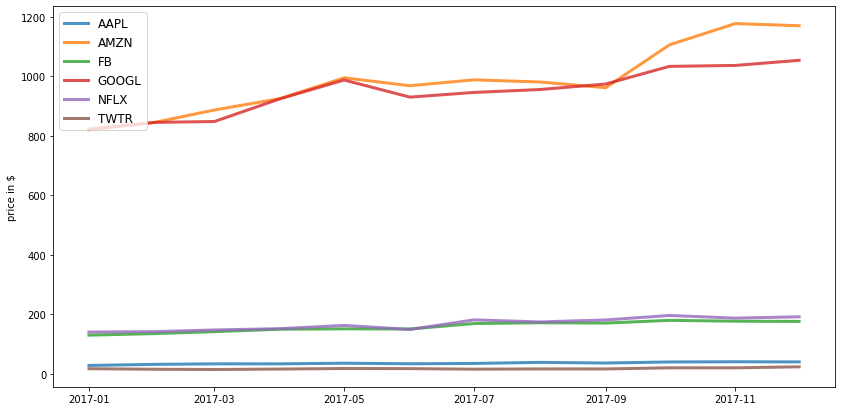

In [20]:
m.plot_series()

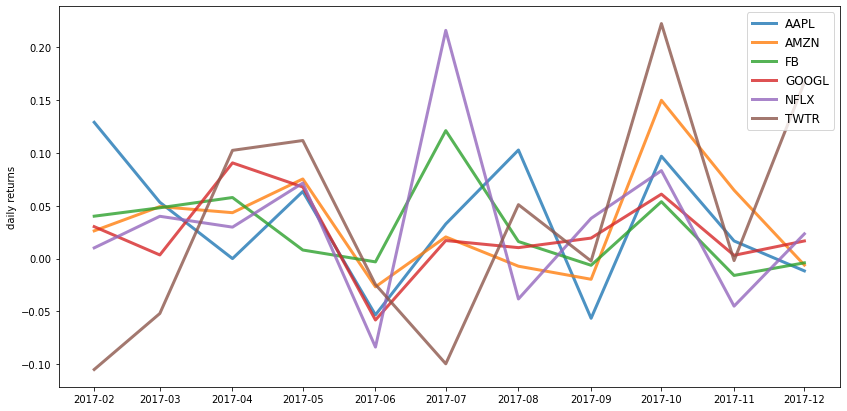

In [21]:
m.plot_returns()

## Approch 1 - Random Portfolios

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.36
Annualised Volatility: 0.11


            AAPL  AMZN     FB  GOOGL  NFLX   TWTR
allocation  11.8  4.77  62.06   7.63   0.5  13.24
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.33
Annualised Volatility: 0.11


            AAPL  AMZN     FB  GOOGL  NFLX  TWTR
allocation  5.55  2.27  44.48  41.66  1.14  4.89


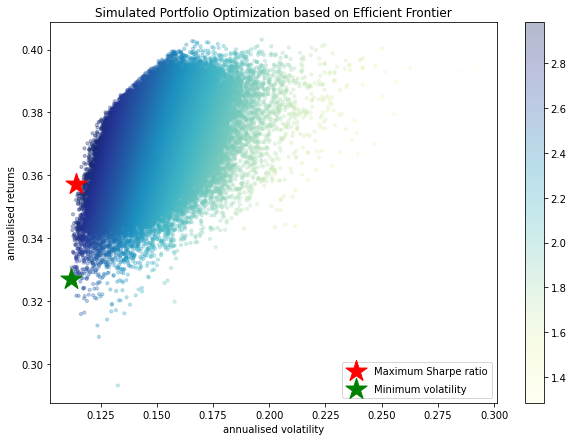

In [22]:
num_portfolios = 100000
risk_free_rate = 0.0178
m.display_simulated_ef_with_random(num_portfolios, risk_free_rate)

## Approch 2 - Efficient Frontier

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.37
Annualised Volatility: 0.12


             AAPL   AMZN    FB  GOOGL  NFLX   TWTR
allocation  13.87  12.08  52.0    5.0   5.0  12.06
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Volatility: 0.12


            AAPL  AMZN     FB  GOOGL  NFLX  TWTR
allocation  6.39   5.0  45.93  31.16   5.0  6.51


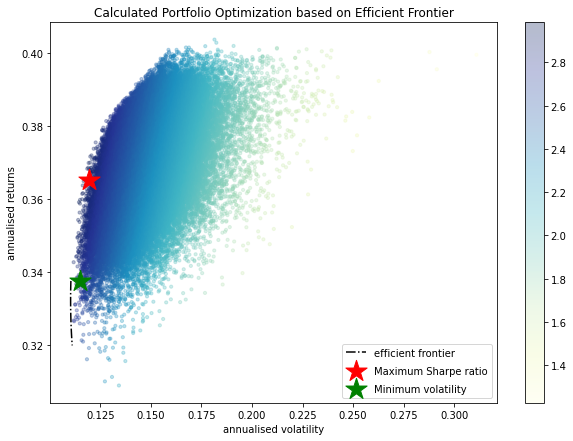

In [24]:
m.display_calculated_ef_with_random(num_portfolios, risk_free_rate)

In [25]:
m.display_ef_with_selected(risk_free_rate)

TypeError: display_ef_with_selected() missing 2 required positional arguments: 'cov_matrix' and 'risk_free_rate'